## Visualize genetic diversity statistics during seasonal variation in prevalence

In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

In [3]:
# Font sizes
plt.rc('font', size=12)         # controls default text sizes
plt.rc('axes', titlesize=14)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

## Preferences

In [4]:
genetic_names.update({
    "mean_k": "C.O.I ($k$)",
    "pi": "Nucl. Diversity ($\pi$)"})

In [5]:
savefig = False

## Load Simulation

In [6]:
sim_path = "../results/2020-06-08_seasonality/sim_seasonality-nh400-doubled_0004/"

In [7]:
# Load full data frame
epoch_df = pd.read_csv(os.path.join(sim_path, "epoch_df.csv"))
epoch_df.index = epoch_df.name
og = pd.read_csv(os.path.join(sim_path, "og.csv"))
op = pd.read_csv(os.path.join(sim_path, "op.csv"))

# Merge on time
ot = pd.merge(left=op, right=og, on="t0")

## Plot

In [8]:
time_limits = (epoch_df.loc["Wet2010", "t0"], epoch_df.loc["Wet2015", "t0"])

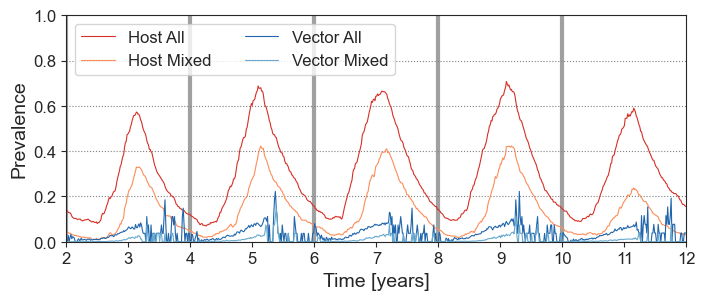

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

prevalence_trajectory_plot(ot, epoch_df, ax,
                           col_dt=prevalence_col_dt,
                           norm_t0=("Wet2009", "t0"),
                           indicate_epochs=[("Wet20%02d" % y, "t0") for y in np.arange(9, 15)],
                           indicate_equilibriums=None,
                           time_limits=time_limits,
                           years_per_major_tick=1)

ax.set_xlabel("Time [years]")
ax.set_ylabel("Prevalence")
ax.legend(loc="upper left", ncol=2)
ax.grid(axis='y', linestyle='dotted', color='grey', which='major')

if savefig:
    fig.savefig("../figs/sec4_trajectory-prevalence.png", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec4_trajectory-prevalence.pdf", bbox_inches="tight", pad_inches=0.5)

## Plot prevalence

## Genetic diversity statistics

In [10]:
metrics = ["mean_k", "pi", "avg_l_ibd", "tajd", "n_segregating", "n_singletons"]
n_metrics = len(metrics)

In [11]:
genetic_names.update({"avg_l_ibd": "Avg. IBD Track Length (bp)"})

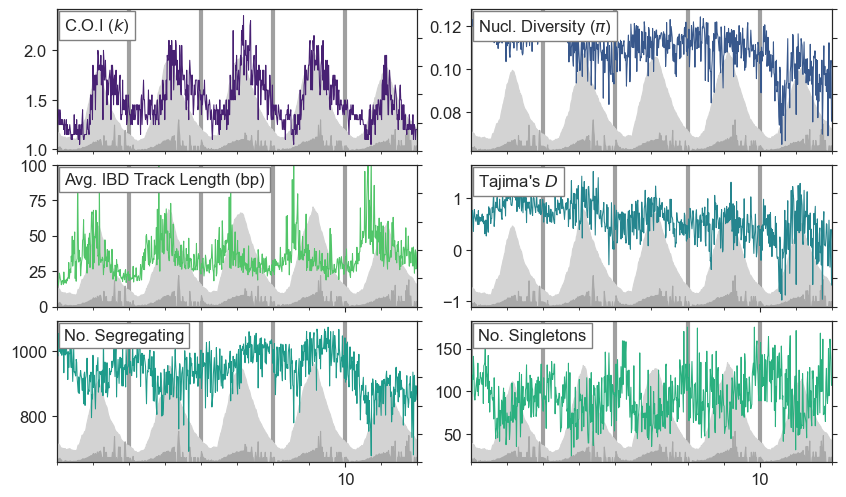

In [13]:
fig, axes = plt.subplots(int(n_metrics/2), 2, figsize=(10, 6), sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.15)

for ax, metric in zip(axes.flatten(), metrics):
    
    # Raw
    genetic_trajectory_plot(metric, ot, epoch_df,
                            tight_metric_col_dt[metric], ax,
                            norm_t0=("Wet2009", "t0"),
                            indicate_epochs=[("Wet20%02d" % y, "t0") for y in np.arange(9, 15)],
                            time_limits=time_limits,
                            years_per_major_tick=10)
    
    if metric == "avg_l_ibd":
        ax.set_ylim((0, 100))

    # y
    #ax.set_ylabel(genetic_names[metric], fontsize=12)
    #ax.set_title(genetic_names[metric], fontsize=12, loc="left")
    ax.annotate(s=genetic_names[metric], xy=(0.02, 0.95), xycoords="axes fraction", 
                ha="left", va="top",
                bbox=dict(boxstyle="square", fc="white", ec="grey", lw=1))
    
if savefig:
    fig.savefig("../figs/sec4_trajectory-genetics.png", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec4_trajectory-genetics.pdf", bbox_inches="tight", pad_inches=0.5)

## With scatterplots

In [14]:
metrics = ["mean_k", "pi", "avg_l_ibd"]
genetic_names.update({"avg_l_ibd": "Avg. IBD\nTrack Length (bp)"})
n_metrics = len(metrics)

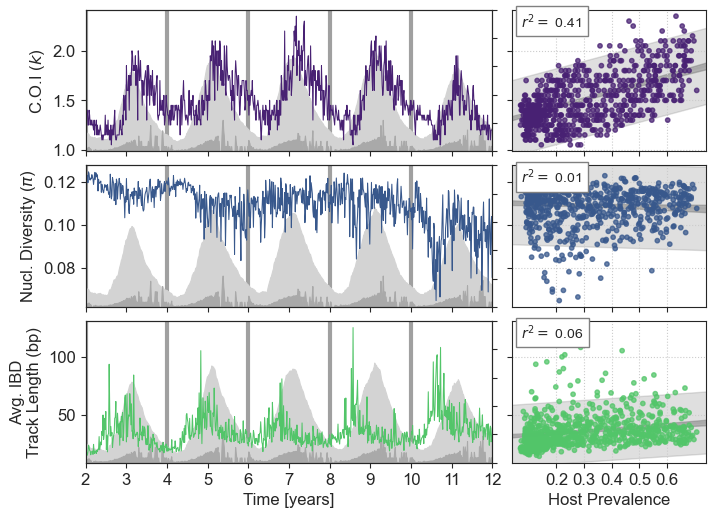

In [15]:
# Plot
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
gs = gridspec.GridSpec(3, 3)

# Prepare Plot Array
for j, metric in enumerate(metrics):
    ax = plt.subplot(gs[j, :2])
    axs = plt.subplot(gs[j, 2], sharey=ax)

    # Raw
    genetic_trajectory_plot(metric, ot, epoch_df,
                            tight_metric_col_dt[metric], ax,
                            norm_t0=("Wet2009", "t0"),
                            indicate_epochs=[("Wet20%02d" % y, "t0") for y in np.arange(9, 15)],
                            time_limits=time_limits,
                            years_per_major_tick=1)
    
    ax.set_ylabel(genetic_names[metric], fontsize=12)
    
    # Scatterplot
    regress_scatterplot(metric, "HX", ot.query("@time_limits[0] <= t0 <= @time_limits[1]"),
                        color=tight_metric_col_dt[metric],                        
                        ax=axs)
    
    axs.set_xticks(np.arange(0.2, 0.7, 0.1))
    axs.grid(which='major', axis='both', linestyle='dotted')
    p = plt.setp(axs.get_yticklabels(), visible=False)
    
    if metric != "avg_l_ibd":
        ax.set_xticklabels("")
        axs.set_xticklabels("")
    else:
        ax.set_xlabel("Time [years]", fontsize=12)
        axs.set_xlabel("Host Prevalence", fontsize=12)
        
            
if savefig:
    fig.savefig("../figs/sec4_trajectory-scatterplot.png", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec4_trajectory-scatterplot.pdf", bbox_inches="tight", pad_inches=0.5)